<a href="https://colab.research.google.com/github/EricFergs/CNN-FashionMNIST-/blob/main/CNNpractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.3.0+cu121
0.18.0+cu121


# Loading Data:

In [ ]:
train_data = datasets.FashionMNIST(
    root = "data", #where to download to
    train = True, #get the training dataset
    download = True, # do we want to download it
    transform = torchvision.transforms.ToTensor(), #how to transform the data
    target_transform = None #how we want to transform labels
)
test_data = datasets.FashionMNIST(
    root = "data", #where to download to
    train = False, #get the training dataset
    download = True, # do we want to download it
    transform = torchvision.transforms.ToTensor(), #how to transform the data
    target_transform = None #how we want to transform labels
)

100%|██████████| 26421880/26421880 [00:06<00:00, 4402008.89it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 355562.81it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6239924.89it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 15445119.45it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
dir(train_data)

['__add__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_exists',
 '_check_legacy_exist',
 '_format_transform_repr',
 '_is_protocol',
 '_load_data',
 '_load_legacy_data',
 '_repr_indent',
 'class_to_idx',
 'classes',
 'data',
 'download',
 'extra_repr',
 'mirrors',
 'processed_folder',
 'raw_folder',
 'resources',
 'root',
 'target_transform',
 'targets',
 'test_data',
 'test_file',
 'test_labels',
 'train',
 'train_data',
 'train_labels',
 'training_file',
 'transform',
 'transforms']

In [ ]:
type(train_data)

torchvision.datasets.mnist.FashionMNIST

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_idx = train_data.class_to_idx  #class_to_idx
class_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

(-0.5, 27.5, 27.5, -0.5)

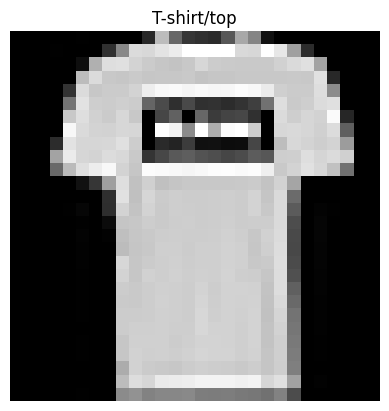

In [ ]:
image, label = train_data[1]
plt.title(class_names[label])
plt.imshow(image.squeeze(), cmap ="gray")
plt.axis(False)

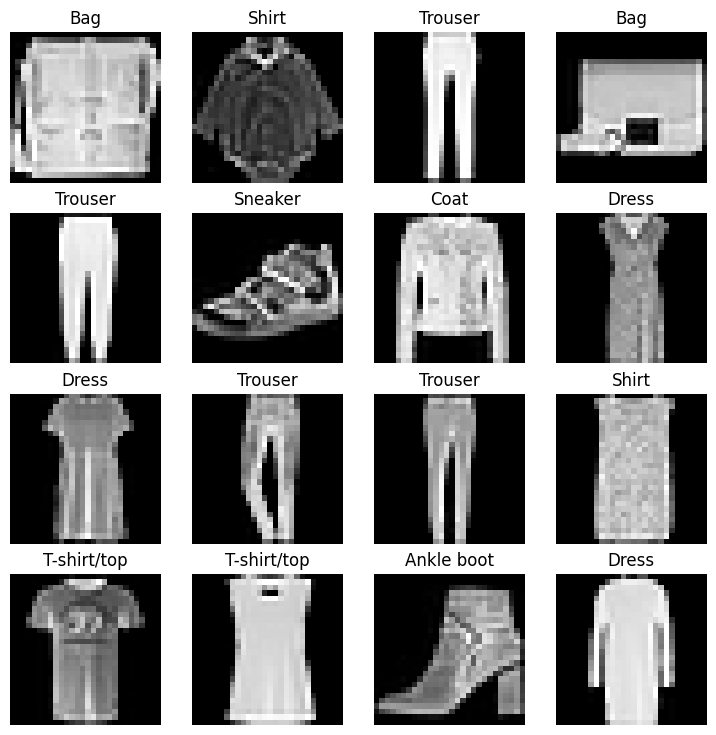

In [ ]:
#torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size = [1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(), cmap ="gray")
  plt.title(class_names[label])
  plt.axis(False)

In [ ]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

# Making Batches

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7d8142a03130>,
 <torch.utils.data.dataloader.DataLoader at 0x7d8142a03670>)

In [ ]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [ ]:
type(train_dataloader)

torch.utils.data.dataloader.DataLoader

In [ ]:
train_features_batch, train_label_batch = next(iter(train_dataloader))
train_features_batch.shape, train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image Size: torch.Size([1, 28, 28]) and label 6


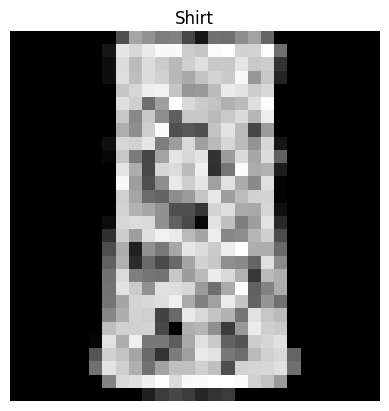

In [ ]:
random_idx = torch.randint(0, len(train_features_batch), size = [1]).item()
img, label = train_features_batch[random_idx], train_label_batch[random_idx]
plt.imshow(img.squeeze(),cmap = "gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image Size: {image.shape} and label {label}")

In [ ]:
flatten_model = nn.Flatten()

x = train_features_batch[31]
output = flatten_model(x)
print(f"Shape before flattening: {x.shape} \nShape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28]) 
Shape after flattening: torch.Size([1, 784])


# Making Model

In [ ]:
from torch import nn
class MNISTFashionModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,
                  out_features = hidden_units),
        nn.Linear(in_features = hidden_units,
                  out_features = output_shape)
    )
  def forward(self,x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
model_0 = MNISTFashionModelV0(input_shape = 784, hidden_units = 10, output_shape = len(class_names)).to("cpu")
model_0

MNISTFashionModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

# Loss function and Optimizer

In [ ]:
import requests
from pathlib import Path

if Path ("helperfunction.py").is_file():
  print("skipping download")
else:
  print("Downloading helper_function")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helperfunction.py", "w") as f:
    f.write(request.text)

In [ ]:
from helperfunction import accuracy_fn

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1,
                            )

# Time function


In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
start_time = timer()
end_time = timer()
print_train_time(start = start_time, end = end_time, device = "cpu")

Train time on cpu: 0.000 seconds


3.058400000099937e-05

# Making the training loop

In [ ]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_start = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}")
  train_loss = 0
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    y_pred = model_0(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
  train_loss /= len(train_dataloader)

  test_acc, test_loss = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      test_pred = model_0(X_test)

      test_loss += loss_fn(test_pred, y_test)

      test_acc += accuracy_fn(y_true = y_test, y_pred = test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)

    test_acc /= len(test_dataloader)

  print(f"Train Loss: {train_loss:.4f} Test Loss {test_loss:.4f} test acc: {test_acc:.4f}")

  train_end = timer()
  total_train_time = print_train_time(start= train_start,
                                      end = train_end,
                                      device = "cpu")



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss: 0.5904 Test Loss 0.5095 test acc: 82.0387
Train time on cpu: 13.584 seconds
Epoch: 1
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss: 0.4763 Test Loss 0.4799 test acc: 83.1969
Train time on cpu: 30.040 seconds
Epoch: 2
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss: 0.4550 Test Loss 0.4766 test acc: 83.4265
Train time on cpu: 42.453 seconds


In [ ]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns dict containing the results of model predicting on data loader"""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      y_pred = model(X)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y, y_pred.argmax(dim = 1))
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}
model_0_result = eval_model(model_0, test_dataloader, loss_fn, accuracy_fn)
model_0_result

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'MNISTFashionModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

# Non linear Model

In [ ]:
class FashionModelV1(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layerstack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,
                  out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units,
                  out_features = output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layerstack(x)

model_1 = FashionModelV1(input_shape = 784,
                         hidden_units = 10,
                         output_shape = len(class_names))

In [ ]:
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
model_1.state_dict()

OrderedDict([('layerstack.1.weight',
              tensor([[-0.0145,  0.0237, -0.0282,  ...,  0.0206, -0.0111, -0.0272],
                      [ 0.0052,  0.0173,  0.0309,  ...,  0.0029,  0.0097,  0.0272],
                      [-0.0169,  0.0213,  0.0087,  ..., -0.0014, -0.0287, -0.0115],
                      ...,
                      [-0.0093,  0.0068, -0.0131,  ..., -0.0139, -0.0208, -0.0275],
                      [ 0.0082,  0.0330,  0.0051,  ...,  0.0033,  0.0030, -0.0047],
                      [-0.0345,  0.0140,  0.0278,  ...,  0.0321, -0.0169,  0.0152]])),
             ('layerstack.1.bias',
              tensor([-0.0084,  0.0227, -0.0054, -0.0284, -0.0354, -0.0013,  0.0105, -0.0211,
                       0.0281,  0.0169])),
             ('layerstack.3.weight',
              tensor([[ 0.1907,  0.1457, -0.3050, -0.0580,  0.1643,  0.1565, -0.2877, -0.1792,
                        0.2305, -0.2618],
                      [ 0.2397, -0.0610,  0.0232,  0.1542,  0.0851, -0.2027,  0.103

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                             lr = 0.1)

# Functions for training and testing loop

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn):
  """Perform training loop for model with dataloader"""

  model.train()
  train_loss, train_acc = 0, 0
  for batch, (X,y) in enumerate(data_loader):
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y, y_pred.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train Loss {train_loss:.3f} Train Acc: {train_acc:.2f}")




In [ ]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn):
  """Performs a testing loop step on model going over data_loader."""
  test_loss, test_acc = 0,0

  model.eval()

  with torch.inference_mode():
    for X, y in data_loader:
      test_pred = model(X)

      test_loss += loss_fn(test_pred, y)

      test_acc += accuracy_fn(y, test_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    print(f"Test Loss:{test_loss:.2f} Test Acc:{test_acc:.2f}")

In [ ]:
epochs = 3
train_start = timer()

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")
  train_step(model = model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn = accuracy_fn,
             )
  test_step(model = model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn = accuracy_fn)
train_end = timer()
total = print_train_time(train_start,train_end,"cpu")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
Train Loss 1.321 Train Acc: 58.13
Test Loss:1.19 Test Acc:64.60
Epoch: 1
--------
Train Loss 1.121 Train Acc: 65.31
Test Loss:1.14 Test Acc:64.31
Epoch: 2
--------
Train Loss 1.096 Train Acc: 66.25
Test Loss:1.14 Test Acc:66.11
Train time on cpu: 33.667 seconds


In [ ]:
model_0_result

{'model_name': 'MNISTFashionModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
total_train_time

42.45288127699999

In [ ]:
model_results = eval_model(model = model_1,
                           data_loader = test_dataloader,
                           loss_fn = loss_fn,
                           accuracy_fn = accuracy_fn)
model_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionModelV1',
 'model_loss': 1.1426204442977905,
 'model_acc': 66.11421725239616}

In [ ]:
model_0_result

{'model_name': 'MNISTFashionModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
class FashionMISTModelV2(nn.Module):
  """Replicates the TinyVGG architecture"""
  def __init__(self,input_shape: int, hidden_units: int, output_shape:int):
    super().__init__()
    self.con_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.con_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*7*7, #trick to calculate this
                  out_features = output_shape)
    )
  def forward(self, x):
    x = self.con_block_1(x)
    #print(x.shape)
    x = self.con_block_2(x)
    #print(x.shape)
    x = self.classifier(x)
    return x

In [ ]:
model_2 = FashionMISTModelV2(input_shape = 1,
                             hidden_units = 10,
                             output_shape = len(class_names))

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.1)

In [ ]:
train_time = timer()
epochs = 1
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model=model_2,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn)
  test_step(model=model_2,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn
            )
train_time_end = timer()
total_time = print_train_time(start = train_time, end = train_time_end, device = "cpu")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-------
Train Loss 0.262 Train Acc: 90.50
Test Loss:0.33 Test Acc:88.66
Epoch: 1
-------
Train Loss 0.255 Train Acc: 90.76
Test Loss:0.28 Test Acc:89.93
Epoch: 2
-------
Train Loss 0.250 Train Acc: 90.87
Test Loss:0.29 Test Acc:90.20
Epoch: 3
-------
Train Loss 0.246 Train Acc: 90.93
Test Loss:0.29 Test Acc:90.08
Epoch: 4
-------
Train Loss 0.243 Train Acc: 91.01
Test Loss:0.30 Test Acc:89.53
Train time on cpu: 281.309 seconds


In [ ]:
model_2_results = eval_model(
    model = model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn,
)

  0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
model_0_result

{'model_name': 'MNISTFashionModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
import pandas as pd
compare_result = pd.DataFrame([model_0_result,
                              model_results,
                              model_2_results])
compare_result

,model_name,model_loss,model_acc
0,MNISTFashionModelV0,0.476639,83.426518
1,FashionModelV1,1.142620,66.114217
2,FashionMISTModelV2,0.318465,88.718051


In [ ]:
compare_time = pd.DataFrame([total_train_time,
                             total,
                             total_time])
compare_time

,0
0,42.452881
1,33.666703
2,149.132475


Text(0, 0.5, 'model')

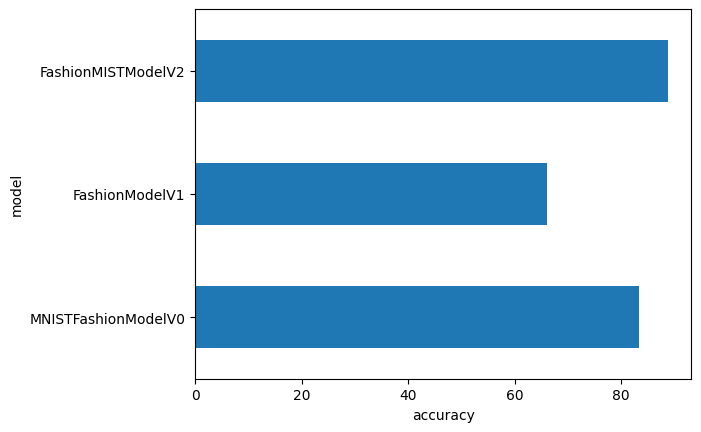

In [ ]:
compare_result.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy")
plt.ylabel("model")

In [ ]:
def make_prediction(model: torch.nn.Module,
                    data: list):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0)
      pred_logits = model(sample)
      pred_prob = torch.softmax(pred_logits.squeeze(), dim = 0)
      pred_probs.append(pred_prob)

  return torch.stack(pred_probs)

In [ ]:
import random

test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)


test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'T-shirt/top')

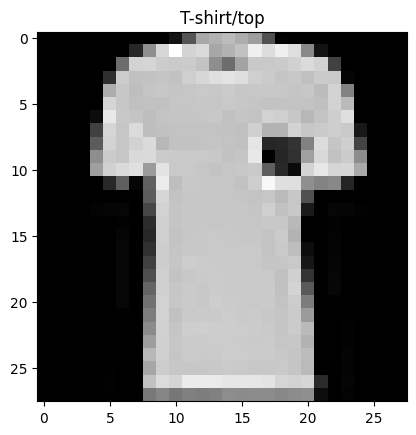

In [ ]:
plt.imshow(test_samples[0].squeeze(),cmap = "gray")
plt.title(class_names[test_labels[0]])

In [ ]:
pred_probs = make_prediction(model = model_2,
                              data = test_samples)
pred_probs = pred_probs.argmax(dim=1)
pred_probs

tensor([2, 4, 2, 2, 5, 8, 3, 0, 0])

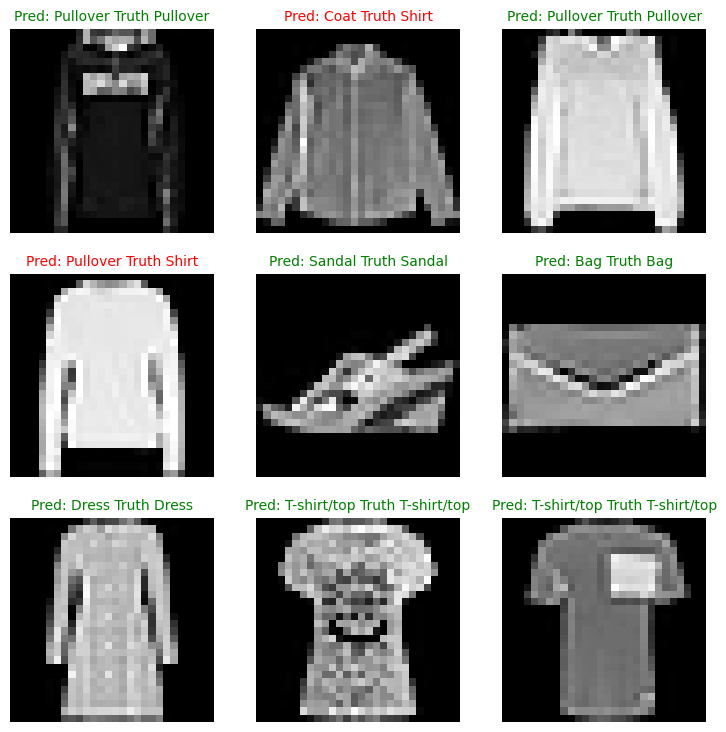

In [ ]:
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)

  plt.imshow(sample.squeeze(), cmap="gray")

  pred_label = class_names[pred_probs[i]]

  truth_label = class_names[test_labels[i]]

  title_text = f"Pred: {pred_label} Truth {truth_label}"

  if pred_label == truth_label:
    plt.title(title_text, fontsize = 10, c ="g")
  else:
    plt.title(title_text, fontsize = 10, c ="r")

  plt.axis(False)

In [ ]:
import mlxtend
mlxtend.__version__

'0.22.0'

In [ ]:
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making Predictions..."):
    y_logits = model_2(X)
    y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)
    y_preds.append(y_pred)

y_pred_tensor = torch.cat(y_preds)

Making Predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
len(y_pred_tensor)

10000

In [ ]:
!pip install -q torchmetrics
import torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 59.8 MB/s eta 0:00:00


In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

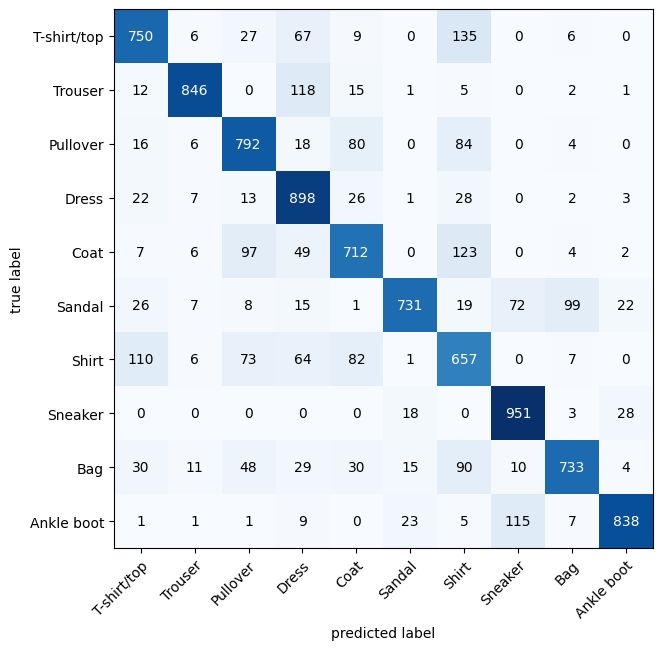

In [ ]:
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds = y_pred_tensor,
                         target = test_data.targets)
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names = class_names,
    figsize = (10,7)
)

In [ ]:
confmat_tensor

tensor([[676,   6,  29,  67,   7,   1, 203,   0,  11,   0],
        [  5, 834,   4, 126,  21,   0,   9,   0,   1,   0],
        [ 11,   6, 742,  14, 122,   0,  98,   0,   7,   0],
        [ 26,  12,  12, 890,  22,   0,  35,   0,   3,   0],
        [  6,   5,  91,  50, 722,   0, 123,   0,   3,   0],
        [ 17,   5,   2,   1,   1, 777,   6,  61, 113,  17],
        [ 93,   5,  79,  62,  91,   0, 657,   0,  13,   0],
        [  1,   0,   0,   0,   0,  24,   0, 925,   8,  42],
        [ 15,   3,   6,   9,  13,   3,  23,   5, 922,   1],
        [  1,   0,   1,   5,   1,  19,   4,  91,   9, 869]])

In [ ]:
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True,
                 exist_ok = True)
MODEL_NAME = "CNNModel.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

PosixPath('models/CNNModel.pth')

In [ ]:
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

In [ ]:
load_model_2 = FashionMISTModelV2(input_shape = 1,
                                  hidden_units = 10,
                                  output_shape = 10)

In [ ]:
load_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_result = eval_model(model = load_model_2, data_loader = test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
loaded_model_result

{'model_name': 'FashionMISTModelV2',
 'model_loss': 0.31846529245376587,
 'model_acc': 88.71805111821087}

In [ ]:
model_2_results

{'model_name': 'FashionMISTModelV2',
 'model_loss': 0.31846529245376587,
 'model_acc': 88.71805111821087}

In [ ]:
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_result["model_loss"]),
              atol=1e-08,
              rtol=0.0001)

tensor(True)